# Importing Libraries abd Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [2]:
df = pd.read_csv("Soccer.csv")
df.head(5)

,Player.Name,Period.Name,Position.Name,Total.Player.Load,Player.Load.Per.Minute,Maximum.Heart.Rate,Minimum.Heart.Rate,Avg.Heart.Rate,Date
0,12,Session,D,276.85373,15.33448,205,0,170.91685,8/6/2019
1,89,Session,GK,238.00543,14.04880,205,101,174.15563,8/6/2019
2,63,Session,F,231.84551,14.36184,206,0,179.25900,8/6/2019
3,15,Session,D,355.02606,18.78379,216,0,177.66543,8/6/2019
4,44,Session,D,318.82076,17.41175,218,0,180.77740,8/6/2019


In [3]:
df.shape

(9554, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9554 entries, 0 to 9553
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Player.Name             9554 non-null   int64  
 1   Period.Name             9554 non-null   object 
 2   Position.Name           9554 non-null   object 
 3   Total.Player.Load       9554 non-null   float64
 4   Player.Load.Per.Minute  9554 non-null   float64
 5   Maximum.Heart.Rate      9554 non-null   int64  
 6   Minimum.Heart.Rate      9554 non-null   int64  
 7   Avg.Heart.Rate          9554 non-null   float64
 8   Date                    9554 non-null   object 
dtypes: float64(3), int64(3), object(3)
memory usage: 671.9+ KB


In [5]:
df.isnull().sum()

,0
Player.Name,0
Period.Name,0
Position.Name,0
Total.Player.Load,0
Player.Load.Per.Minute,0
Maximum.Heart.Rate,0
Minimum.Heart.Rate,0
Avg.Heart.Rate,0
Date,0


In [6]:
df['Date'] = pd.to_datetime(df['Date'])

In [7]:
df['Period.Name'].value_counts()

,count
Period.Name,
Session,2131
Warm Up,448
Warmup,343
1st Half,248
2nd Half,244
...,...
HR recovery 2,1
Team Defense Organization,1
Group 2 39,1


For now, we are interested in total player load for the season, so we will filter out the rows where Period.Name is "Session".

In [8]:
session_df = df.loc[df['Period.Name'] == "Session"]
session_df.shape

(2131, 9)

In [9]:
session_df['Session.Duration'] = (session_df['Total.Player.Load'] / session_df['Player.Load.Per.Minute'])
session_df.head(5)

/tmp/ipython-input-9-3297027465.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  session_df['Session.Duration'] = (session_df['Total.Player.Load'] / session_df['Player.Load.Per.Minute'])


,Player.Name,Period.Name,Position.Name,Total.Player.Load,Player.Load.Per.Minute,Maximum.Heart.Rate,Minimum.Heart.Rate,Avg.Heart.Rate,Date,Session.Duration
0,12,Session,D,276.85373,15.33448,205,0,170.91685,2019-08-06,18.054328
1,89,Session,GK,238.00543,14.04880,205,101,174.15563,2019-08-06,16.941335
2,63,Session,F,231.84551,14.36184,206,0,179.25900,2019-08-06,16.143162
3,15,Session,D,355.02606,18.78379,216,0,177.66543,2019-08-06,18.900662
4,44,Session,D,318.82076,17.41175,218,0,180.77740,2019-08-06,18.310667


In [10]:
print(session_df.columns)

Index(['Player.Name', 'Period.Name', 'Position.Name', 'Total.Player.Load',
       'Player.Load.Per.Minute', 'Maximum.Heart.Rate', 'Minimum.Heart.Rate',
       'Avg.Heart.Rate', 'Date', 'Session.Duration'],
      dtype='object')


# Checking for Outliers

Players with very limited use of Device can skew the data.

In [11]:
rank_total_player = session_df.groupby(['Player.Name', 'Position.Name'])[['Period.Name']].count().reset_index()
print("Total number of sessions captured during entire season is :")


print(rank_total_player.sort_values(by='Period.Name', ascending = False))

Total number of sessions captured during entire season is :
    Player.Name Position.Name  Period.Name
3            12             D           89
6            21             D           89
19           66             M           89
11           43             M           88
10           39             D           88
17           62             F           88
26           97             F           88
9            35             F           87
7            23            GK           87
22           89            GK           85
0             4             M           84
28          100             D           84
15           52             D           84
8            34             M           83
4            15             D           83
21           86             M           82
12           44             D           80
18           63             F           80
23           91             F           78
20           71            GK           77
14           49             F        

<Axes: ylabel='Period.Name'>

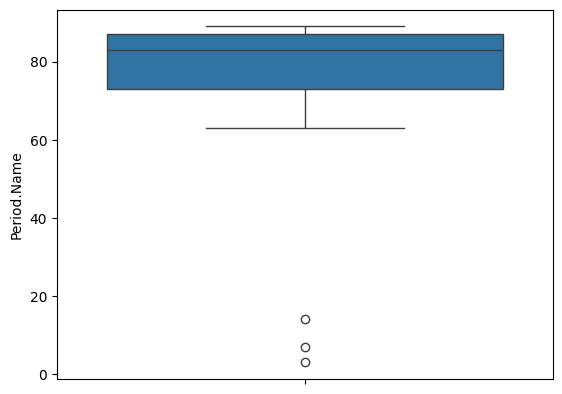

In [12]:
sns.boxplot(rank_total_player['Period.Name'])

It seems that there are two players that have a VERY limited number of sessions recorded regarding Catapult data. Let's see how many minutes these same athletes had recorded during Catapult sessions.
Also "Player 95" is listed as a defender (D) for 63 sessions and as a forward (F) for another 14 sessions. Since this adds up to a typical number of sessions, so we can consider this player.

In [13]:
rank_total_pl = session_df.groupby(['Player.Name', 'Position.Name'])[['Session.Duration']].sum().reset_index()
print("Total duration captured for entire season :")


print(rank_total_pl.sort_values(by='Session.Duration', ascending = False))

Total duration captured for entire season :
    Player.Name Position.Name  Session.Duration
22           89            GK       7256.995713
17           62             F       6949.439679
6            21             D       6931.008604
0             4             M       6922.743520
11           43             M       6896.000699
19           66             M       6702.279641
10           39             D       6533.952654
28          100             D       6507.394600
12           44             D       6375.365217
3            12             D       6072.777551
15           52             D       5765.626189
18           63             F       5626.914479
9            35             F       5616.998042
26           97             F       5398.132561
21           86             M       5379.001886
2            10             D       5149.013432
23           91             F       5052.888632
4            15             D       5035.069630
7            23            GK       4989.634

We can clearly see that "Player 62" and "Player 98" have very limited durations in this season. In addition, we will leave "Player 95" in the team dataset. Thats why we have to drop them from dataset.

In [14]:
session_df = session_df.set_index('Player.Name')
session_df

,Period.Name,Position.Name,Total.Player.Load,Player.Load.Per.Minute,Maximum.Heart.Rate,Minimum.Heart.Rate,Avg.Heart.Rate,Date,Session.Duration
Player.Name,,,,,,,,,
12,Session,D,276.85373,15.33448,205,0,170.91685,2019-08-06,18.054328
89,Session,GK,238.00543,14.04880,205,101,174.15563,2019-08-06,16.941335
63,Session,F,231.84551,14.36184,206,0,179.25900,2019-08-06,16.143162
15,Session,D,355.02606,18.78379,216,0,177.66543,2019-08-06,18.900662
44,Session,D,318.82076,17.41175,218,0,180.77740,2019-08-06,18.310667
...,...,...,...,...,...,...,...,...,...
23,Session,GK,185.24280,4.66020,0,0,0.00000,2019-11-24,39.749968
21,Session,D,1364.75000,9.87637,129,0,129.00000,2019-11-24,138.183361
43,Session,M,1294.72809,11.25361,225,0,166.42591,2019-11-24,115.050023


In [15]:
session_df = session_df.drop([98, 62])
session_df

,Period.Name,Position.Name,Total.Player.Load,Player.Load.Per.Minute,Maximum.Heart.Rate,Minimum.Heart.Rate,Avg.Heart.Rate,Date,Session.Duration
Player.Name,,,,,,,,,
12,Session,D,276.85373,15.33448,205,0,170.91685,2019-08-06,18.054328
89,Session,GK,238.00543,14.04880,205,101,174.15563,2019-08-06,16.941335
63,Session,F,231.84551,14.36184,206,0,179.25900,2019-08-06,16.143162
15,Session,D,355.02606,18.78379,216,0,177.66543,2019-08-06,18.900662
44,Session,D,318.82076,17.41175,218,0,180.77740,2019-08-06,18.310667
...,...,...,...,...,...,...,...,...,...
23,Session,GK,185.24280,4.66020,0,0,0.00000,2019-11-24,39.749968
21,Session,D,1364.75000,9.87637,129,0,129.00000,2019-11-24,138.183361
43,Session,M,1294.72809,11.25361,225,0,166.42591,2019-11-24,115.050023


In [16]:
session_df = session_df.set_index('Date', append=True)
session_df.head(4)

,,Period.Name,Position.Name,Total.Player.Load,Player.Load.Per.Minute,Maximum.Heart.Rate,Minimum.Heart.Rate,Avg.Heart.Rate,Session.Duration
Player.Name,Date,,,,,,,,
12,2019-08-06,Session,D,276.85373,15.33448,205,0,170.91685,18.054328
89,2019-08-06,Session,GK,238.00543,14.04880,205,101,174.15563,16.941335
63,2019-08-06,Session,F,231.84551,14.36184,206,0,179.25900,16.143162
15,2019-08-06,Session,D,355.02606,18.78379,216,0,177.66543,18.900662


In [17]:
session_df.reset_index(level=['Player.Name'], inplace=True)
session_df.head(4)

,Player.Name,Period.Name,Position.Name,Total.Player.Load,Player.Load.Per.Minute,Maximum.Heart.Rate,Minimum.Heart.Rate,Avg.Heart.Rate,Session.Duration
Date,,,,,,,,,
2019-08-06,12,Session,D,276.85373,15.33448,205,0,170.91685,18.054328
2019-08-06,89,Session,GK,238.00543,14.04880,205,101,174.15563,16.941335
2019-08-06,63,Session,F,231.84551,14.36184,206,0,179.25900,16.143162
2019-08-06,15,Session,D,355.02606,18.78379,216,0,177.66543,18.900662


In [18]:
session_df['Player.Name'] = session_df['Player.Name'].astype('object')
session_df.head(4)

,Player.Name,Period.Name,Position.Name,Total.Player.Load,Player.Load.Per.Minute,Maximum.Heart.Rate,Minimum.Heart.Rate,Avg.Heart.Rate,Session.Duration
Date,,,,,,,,,
2019-08-06,12,Session,D,276.85373,15.33448,205,0,170.91685,18.054328
2019-08-06,89,Session,GK,238.00543,14.04880,205,101,174.15563,16.941335
2019-08-06,63,Session,F,231.84551,14.36184,206,0,179.25900,16.143162
2019-08-06,15,Session,D,355.02606,18.78379,216,0,177.66543,18.900662


In [19]:
session_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2033 entries, 2019-08-06 to 2019-11-24
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Player.Name             2033 non-null   object 
 1   Period.Name             2033 non-null   object 
 2   Position.Name           2033 non-null   object 
 3   Total.Player.Load       2033 non-null   float64
 4   Player.Load.Per.Minute  2033 non-null   float64
 5   Maximum.Heart.Rate      2033 non-null   int64  
 6   Minimum.Heart.Rate      2033 non-null   int64  
 7   Avg.Heart.Rate          2033 non-null   float64
 8   Session.Duration        2033 non-null   float64
dtypes: float64(4), int64(2), object(3)
memory usage: 158.8+ KB


# Data Manipulation

To accurately calculate the 7-day and 28-day rolling averages required for **ACWR** (Acute Chronic Workload Ratio), we need a continuous daily record of each player's training load.

However, training data is not always recorded every single day (e.g., on rest days or due to sensor issues), which leads to missing dates in the dataset.

These missing dates are not stored as NaN, but simply don’t exist as rows in the data.

**To handle this:**

We use resample() to ensure that every day between the player's first and last session is represented.

We then use fillna(0) to assign zero workload to any missing days — under the assumption that no session occurred on those days.

This approach ensures that each day contributes equally when computing rolling averages and avoids underestimating or overestimating player load trends.

In [20]:
df_acwr_12 = session_df[session_df['Player.Name'] == 12].copy()
df_acwr_12.head(4)

,Player.Name,Period.Name,Position.Name,Total.Player.Load,Player.Load.Per.Minute,Maximum.Heart.Rate,Minimum.Heart.Rate,Avg.Heart.Rate,Session.Duration
Date,,,,,,,,,
2019-08-06,12,Session,D,276.85373,15.33448,205,0,170.91685,18.054328
2019-08-06,12,Session,D,511.00000,10.61513,221,0,165.81889,48.138836
2019-08-06,12,Session,D,502.98280,6.16700,217,0,154.58949,81.560370
2019-08-07,12,Session,D,206.37270,10.45216,189,106,149.62142,19.744503


In [21]:
numerics = df_acwr_12.select_dtypes(include='number').columns
numerics

Index(['Total.Player.Load', 'Player.Load.Per.Minute', 'Maximum.Heart.Rate',
       'Minimum.Heart.Rate', 'Avg.Heart.Rate', 'Session.Duration'],
      dtype='object')

In [22]:
df_12 = df_acwr_12[numerics].resample('D').agg({
    'Total.Player.Load': 'sum',
    'Player.Load.Per.Minute': 'mean',
    'Session.Duration': 'sum',
    'Maximum.Heart.Rate': 'max',
    'Minimum.Heart.Rate': 'min',
    'Avg.Heart.Rate': 'mean'
})
df_12 = df_12.fillna(0)
df_12.head(5)

,Total.Player.Load,Player.Load.Per.Minute,Session.Duration,Maximum.Heart.Rate,Minimum.Heart.Rate,Avg.Heart.Rate
Date,,,,,,
2019-08-06,1290.83653,10.705537,147.753533,221.0,0.0,163.775077
2019-08-07,1328.71860,7.398850,212.571606,225.0,0.0,149.425883
2019-08-08,0.00000,0.000000,0.000000,0.0,0.0,0.000000
2019-08-09,1224.42053,6.975995,175.575107,213.0,0.0,146.145690
2019-08-10,391.29193,4.942210,79.173473,214.0,0.0,132.512180


We will now create 2 new columns to store the 7-day and 28-day moving averages, titled "Acute_stats" and "Chronic_stats", respectively. We will also create a new column titled "Acute:Chronic" that stores the acute to chronic player load ratio.

In [23]:
df_12["Acute_stats"] = (df_12.loc[:,"Total.Player.Load"].rolling('7D', 7).sum())/7
df_12["Chronic_stats"] = (df_12.loc[:,"Total.Player.Load"].rolling('28D', 28).sum())/28
df_12["Acute:Chronic"] = df_12.loc[:,"Acute_stats"]/df_12.loc[:,"Chronic_stats"]
df_12

,Total.Player.Load,Player.Load.Per.Minute,Session.Duration,Maximum.Heart.Rate,Minimum.Heart.Rate,Avg.Heart.Rate,Acute_stats,Chronic_stats,Acute:Chronic
Date,,,,,,,,,
2019-08-06,1290.83653,10.705537,147.753533,221.0,0.0,163.775077,NaN,NaN,NaN
2019-08-07,1328.71860,7.398850,212.571606,225.0,0.0,149.425883,NaN,NaN,NaN
2019-08-08,0.00000,0.000000,0.000000,0.0,0.0,0.000000,NaN,NaN,NaN
2019-08-09,1224.42053,6.975995,175.575107,213.0,0.0,146.145690,NaN,NaN,NaN
2019-08-10,391.29193,4.942210,79.173473,214.0,0.0,132.512180,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2019-11-20,277.82471,5.737490,48.422692,130.0,0.0,112.472690,376.017229,270.497919,1.390093
2019-11-21,306.31356,6.508080,47.066656,0.0,0.0,0.000000,385.597211,270.831470,1.423753
2019-11-22,1370.46912,10.152160,134.992861,136.0,0.0,136.000000,392.976070,305.296359,1.287195


# Data Visualization

In [24]:
fig1 = go.Figure()
fig1.add_trace(
    go.Bar(
        x=df_12.index,
        y=df_12["Total.Player.Load"],
        marker_color="#4C72B0",
        name="Total Load"))

fig1.update_layout(
    title="Daily Total Player Load – Player 12",
    xaxis_title="Date",
    yaxis_title="Player Load",
    height=400,
    template="plotly_white")

fig1.show()

In [25]:
fig2 = make_subplots(
    rows=1, cols=1,
    specs=[[{"secondary_y": True}]],
    subplot_titles=["ACWR Breakdown – Player 12"])

# Acute Load (bar)
fig2.add_trace(
    go.Bar(
        x=df_12.index,
        y=df_12["Acute_stats"],
        name="Acute Load",
        marker_color="#FA8775"),
    row=1, col=1, secondary_y=False)

# Chronic Load (area/line)
fig2.add_trace(
    go.Scatter(
        x=df_12.index,
        y=df_12["Chronic_stats"],
        name="Chronic Load",
        fill='tonexty',
        mode='lines',
        line=dict(color="#FFB14E")),
    row=1, col=1, secondary_y=False)

# ACWR line
fig2.add_trace(
    go.Scatter(
        x=df_12.index,
        y=df_12["Acute:Chronic"],
        name="ACWR",
        mode='lines+markers',
        line=dict(color="#882C78", width=3)),
    row=1, col=1, secondary_y=True)

# ACWR threshold line at y=1.5
fig2.add_shape(
    type="line",
    x0=df_12.index.min(),
    x1=df_12.index.max(),
    y0=1.5, y1=1.5,
    line=dict(color="gray", width=2, dash="dash"),
    yref='y2')

fig2.update_layout(
    title="Acute vs Chronic Load & ACWR – Player 12",
    height=500,
    template="plotly_white")

fig2.update_yaxes(title_text="Load (Acute & Chronic)", secondary_y=False)
fig2.update_yaxes(title_text="ACWR", range=[0, 3], secondary_y=True)

fig2.show()

This ACWR breakdown shows the interaction between acute (short-term) and chronic (long-term) workload for Player 12.

The early-season spike in acute load likely corresponds to pre-season conditioning or two-a-day training sessions, which causes a high chronic base early on.

Mid-season dips in ACWR may reflect periods of reduced intensity or recovery.

Based on the ACWR profile of Player 12, there are brief periods where the ACWR exceeds 1.5, particularly toward the end of the season.
This suggests an increased relative load spike, which in literature is associated with higher injury risk.
While this does not guarantee an injury, it may warrant monitoring or training adjustments to reduce load spikes, especially before or after match-intense periods.

In [26]:
session_df.head(3)

,Player.Name,Period.Name,Position.Name,Total.Player.Load,Player.Load.Per.Minute,Maximum.Heart.Rate,Minimum.Heart.Rate,Avg.Heart.Rate,Session.Duration
Date,,,,,,,,,
2019-08-06,12,Session,D,276.85373,15.33448,205,0,170.91685,18.054328
2019-08-06,89,Session,GK,238.00543,14.04880,205,101,174.15563,16.941335
2019-08-06,63,Session,F,231.84551,14.36184,206,0,179.25900,16.143162


In [27]:
# Function to resample per player
df_all = session_df.groupby("Date").agg({
    'Total.Player.Load': 'sum',
    'Player.Load.Per.Minute': 'mean',
    'Session.Duration': 'sum',
    'Maximum.Heart.Rate': 'max',
    'Minimum.Heart.Rate': 'min',
    'Avg.Heart.Rate': 'mean'
})
df_all = df_all.resample('D').agg({
    'Total.Player.Load': 'sum',
    'Player.Load.Per.Minute': 'mean',
    'Session.Duration': 'sum',
    'Maximum.Heart.Rate': 'max',
    'Minimum.Heart.Rate': 'min',
    'Avg.Heart.Rate': 'mean'
})
df_all = df_all.fillna(0)

In [28]:
df_all.head(4)

,Total.Player.Load,Player.Load.Per.Minute,Session.Duration,Maximum.Heart.Rate,Minimum.Heart.Rate,Avg.Heart.Rate
Date,,,,,,
2019-08-06,23137.80677,9.794475,3080.287415,235.0,0.0,139.729904
2019-08-07,23271.41950,6.058498,4549.577157,230.0,0.0,129.223741
2019-08-08,0.00000,0.000000,0.000000,0.0,0.0,0.000000
2019-08-09,20985.59830,5.999624,3626.730549,229.0,0.0,130.714534


In [29]:
df_all["Acute_stats"] = (df_all.loc[:,"Total.Player.Load"].rolling('7D', 7).sum())/7
df_all["Chronic_stats"] = (df_all.loc[:,"Total.Player.Load"].rolling('28D', 28).sum())/28
df_all["Acute:Chronic"] = df_all.loc[:,"Acute_stats"]/df_all.loc[:,"Chronic_stats"]
df_all.head(5)

,Total.Player.Load,Player.Load.Per.Minute,Session.Duration,Maximum.Heart.Rate,Minimum.Heart.Rate,Avg.Heart.Rate,Acute_stats,Chronic_stats,Acute:Chronic
Date,,,,,,,,,
2019-08-06,23137.80677,9.794475,3080.287415,235.0,0.0,139.729904,NaN,NaN,NaN
2019-08-07,23271.41950,6.058498,4549.577157,230.0,0.0,129.223741,NaN,NaN,NaN
2019-08-08,0.00000,0.000000,0.000000,0.0,0.0,0.000000,NaN,NaN,NaN
2019-08-09,20985.59830,5.999624,3626.730549,229.0,0.0,130.714534,NaN,NaN,NaN
2019-08-10,9180.45280,4.817516,1847.573861,223.0,0.0,118.418250,NaN,NaN,NaN


In [30]:
fig3 = go.Figure()
fig3.add_trace(
    go.Bar(
        x=df_all.index,
        y=df_all["Total.Player.Load"],
        marker_color="#4C72B0",
        name="Total Load"))

fig3.update_layout(
    title="Daily Total Player Load – Total Player",
    xaxis_title="Date",
    yaxis_title="Player Load",
    height=400,
    template="plotly_white")

fig3.show()

We observe several high-load spikes early in the season, likely associated with pre-season conditioning blocks or double-session training days. These intense workloads are expected as the team ramps up fitness ahead of competitive matches.

As the season progresses, load levels show periodic fluctuations, which may reflect the alternation between training, match days, and recovery sessions.

There are also multiple low-load or zero-load days, which may correspond to planned rest days, reduced squad training, or missing data (e.g., injury, device error).

In [31]:
fig4 = make_subplots(
    rows=1, cols=1,
    specs=[[{"secondary_y": True}]],
    subplot_titles=["ACWR Breakdown – All Player"])

# Acute Load (bar)
fig4.add_trace(
    go.Bar(
        x=df_all.index,
        y=df_all["Acute_stats"],
        name="Acute Load",
        marker_color="#FA8775"),
    row=1, col=1, secondary_y=False)

# Chronic Load (area/line)
fig4.add_trace(
    go.Scatter(
        x=df_all.index,
        y=df_all["Chronic_stats"],
        name="Chronic Load",
        fill='tonexty',
        mode='lines',
        line=dict(color="#FFB14E")),
    row=1, col=1, secondary_y=False)

# ACWR line
fig4.add_trace(
    go.Scatter(
        x=df_all.index,
        y=df_all["Acute:Chronic"],
        name="ACWR",
        mode='lines+markers',
        line=dict(color="#882C78", width=3)),
    row=1, col=1, secondary_y=True)

# ACWR threshold line at y=1.5
fig4.add_shape(
    type="line",
    x0=df_all.index.min(),
    x1=df_all.index.max(),
    y0=1.5, y1=1.5,
    line=dict(color="gray", width=2, dash="dash"),
    yref='y2')

fig4.update_layout(
    title="Acute vs Chronic Load & ACWR – Total Player",
    height=500,
    template="plotly_white")

fig4.update_yaxes(title_text="Load (Acute & Chronic)", secondary_y=False)
fig4.update_yaxes(title_text="ACWR", range=[0, 3], secondary_y=True)

fig4.show()

Early in the season (August), we observe extremely high acute loads, likely due to pre-season ramp-up. This results in relatively low ACWR values, as the chronic load had not yet accumulated.

From September to October, ACWR stabilizes in the 0.8 to 1 range, which is considered the optimum training zone — balancing stress and adaptation effectively. This period likely reflects a well-planned balance of training and recovery.

This analysis supports that overall load management appears steady, though load spikes near competition phases should be monitored to avoid elevated injury risk. Regular team-level ACWR monitoring, combined with player-specific analysis, would strengthen individual injury prevention strategies.

In [32]:
df_all['Risk_Flag'] = df_all['Acute:Chronic'].apply(lambda x: 'High' if x > 1.5 else 'Optimum' if 0.3 < x <= 1.5 else 'Low')
df_all.head(30)

,Total.Player.Load,Player.Load.Per.Minute,Session.Duration,Maximum.Heart.Rate,Minimum.Heart.Rate,Avg.Heart.Rate,Acute_stats,Chronic_stats,Acute:Chronic,Risk_Flag
Date,,,,,,,,,,
2019-08-06,23137.80677,9.794475,3080.287415,235.0,0.0,139.729904,NaN,NaN,NaN,Low
2019-08-07,23271.41950,6.058498,4549.577157,230.0,0.0,129.223741,NaN,NaN,NaN,Low
2019-08-08,0.00000,0.000000,0.000000,0.0,0.0,0.000000,NaN,NaN,NaN,Low
2019-08-09,20985.59830,5.999624,3626.730549,229.0,0.0,130.714534,NaN,NaN,NaN,Low
2019-08-10,9180.45280,4.817516,1847.573861,223.0,0.0,118.418250,NaN,NaN,NaN,Low
2019-08-11,0.00000,0.000000,0.000000,0.0,0.0,0.000000,NaN,NaN,NaN,Low
2019-08-12,14129.30937,6.166981,2281.959940,225.0,0.0,124.008101,12957.798106,NaN,NaN,Low
2019-08-13,16911.25316,4.794420,3543.042940,225.0,0.0,126.464561,12068.290447,NaN,NaN,Low
2019-08-14,9825.11447,5.287452,1860.235412,221.0,0.0,122.602739,10147.389729,NaN,NaN,Low


In [33]:
# Saving dataframe in csv format
df_all.to_csv("soccer_acwr_processed.csv", index=True)

In [34]:
#Player wise dataset
object_cols = ['Player.Name', 'Position.Name', 'Period.Name']

#List of players
players = session_df['Player.Name'].unique()

#List to collect each player's ACWR summary
player_acwr_df = []

# 6. Loop through each player
for player in players:
    # Filter data for one player
    player_df = session_df[session_df['Player.Name'] == player]

    # Preserve latest known values of object columns (e.g., position, period)
    latest_meta = player_df[object_cols].iloc[-1].to_dict()  # last known values

    # Resample only numerics to daily level
    daily_df = player_df[numerics].resample('D').agg({
    'Total.Player.Load': 'sum',
    'Player.Load.Per.Minute': 'mean',
    'Session.Duration': 'sum',
    'Maximum.Heart.Rate': 'max',
    'Minimum.Heart.Rate': 'min',
    'Avg.Heart.Rate': 'mean'})
    daily_df = daily_df.fillna(0)

    # Calculate Acute, Chronic, and ACWR
    daily_df["Acute_stats"] = (daily_df.loc[:,"Total.Player.Load"].rolling('7D', 7).sum())/7
    daily_df["Chronic_stats"] = (daily_df.loc[:,"Total.Player.Load"].rolling('28D', 28).sum())/28
    daily_df["ACWR"] = daily_df.loc[:,"Acute_stats"]/daily_df.loc[:,"Chronic_stats"]

    # Add Risk Flag
    daily_df['Risk_Flag'] = daily_df['ACWR'].apply(
        lambda x: 'Over training' if x > 1.5 else 'Optimum' if x > 0.3 else 'Under training'
    )

    # Add object columns
    for col, val in latest_meta.items():
        daily_df[col] = val

    # Reset index to get date back
    daily_df = daily_df.reset_index()

    # Append to master list
    player_acwr_df.append(daily_df)


In [35]:
#Combine all into final dataframe
final_df = pd.concat(player_acwr_df, ignore_index=True)
final_df.head(20)

,Date,Total.Player.Load,Player.Load.Per.Minute,Session.Duration,Maximum.Heart.Rate,Minimum.Heart.Rate,Avg.Heart.Rate,Acute_stats,Chronic_stats,ACWR,Risk_Flag,Player.Name,Position.Name,Period.Name
0,2019-08-06,1290.83653,10.705537,147.753533,221.0,0.0,163.775077,NaN,NaN,NaN,Under training,12,D,Session
1,2019-08-07,1328.71860,7.398850,212.571606,225.0,0.0,149.425883,NaN,NaN,NaN,Under training,12,D,Session
2,2019-08-08,0.00000,0.000000,0.000000,0.0,0.0,0.000000,NaN,NaN,NaN,Under training,12,D,Session
3,2019-08-09,1224.42053,6.975995,175.575107,213.0,0.0,146.145690,NaN,NaN,NaN,Under training,12,D,Session
4,2019-08-10,391.29193,4.942210,79.173473,214.0,0.0,132.512180,NaN,NaN,NaN,Under training,12,D,Session
5,2019-08-11,0.00000,0.000000,0.000000,0.0,0.0,0.000000,NaN,NaN,NaN,Under training,12,D,Session
6,2019-08-12,722.79465,7.084900,102.019033,225.0,0.0,152.059950,708.294606,NaN,NaN,Under training,12,D,Session
7,2019-08-13,945.95345,5.748940,165.921950,221.0,0.0,138.152025,659.025594,NaN,NaN,Under training,12,D,Session
8,2019-08-14,487.89632,6.046940,80.684829,183.0,77.0,131.730120,538.908126,NaN,NaN,Under training,12,D,Session
9,2019-08-15,492.30634,6.851560,71.853175,217.0,0.0,148.967040,609.237603,NaN,NaN,Under training,12,D,Session


In [36]:
final_df[final_df['Player.Name']==63]

,Date,Total.Player.Load,Player.Load.Per.Minute,Session.Duration,Maximum.Heart.Rate,Minimum.Heart.Rate,Avg.Heart.Rate,Acute_stats,Chronic_stats,ACWR,Risk_Flag,Player.Name,Position.Name,Period.Name
222,2019-08-06,973.93330,8.960820,145.842298,206.0,0.0,169.000977,NaN,NaN,NaN,Under training,63,F,Session
223,2019-08-07,1081.71264,6.466373,212.306644,202.0,0.0,149.092143,NaN,NaN,NaN,Under training,63,F,Session
224,2019-08-08,0.00000,0.000000,0.000000,0.0,0.0,0.000000,NaN,NaN,NaN,Under training,63,F,Session
225,2019-08-09,838.09220,4.771740,175.575281,220.0,94.0,142.940075,NaN,NaN,NaN,Under training,63,F,Session
226,2019-08-10,411.94819,4.779070,86.198401,198.0,92.0,137.359030,NaN,NaN,NaN,Under training,63,F,Session
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328,2019-11-20,222.56910,4.596380,48.422694,85.0,0.0,77.998620,280.785986,172.685311,1.625998,Over training,63,F,Session
329,2019-11-21,241.58867,5.132900,47.066701,0.0,0.0,0.000000,285.303223,157.858267,1.807338,Over training,63,F,Session
330,2019-11-22,841.11752,8.588750,97.932472,139.0,0.0,139.000000,291.103247,183.293547,1.588181,Over training,63,F,Session
331,2019-11-23,133.10760,3.983270,33.416665,0.0,0.0,0.000000,310.118619,178.236044,1.739932,Over training,63,F,Session


In [37]:
# Save to csv file
final_df.to_csv("playerwise_acwr_summary.csv", index=False)